In [1]:
# Hierarchical Bayes Part-Worth Estimation and Study of Consumer Preferences

# having demonstrated the predictive power of the HB model...
# we now return to the complete set of 16 choice sets to obtain 
# individual-level part-worths for further analysis 
# analysis guided by ternary model of consumer preference and market response
# brand loyalty... price sensitivity... and feature focus... are key aspects
# to consider in determining pricing policy

library(lattice)  # package for lattice graphics 
library(vcd)  # graphics package with mosaic plots for mosaic and ternary plots
library(ggplot2)  # package ggplot implements Grammar of Graphics approach
library(ChoiceModelR)  # for Hierarchical Bayes Estimation
library(caret)  # for confusion matrix... evaluation of choice set predictions

# load split-plotting utilities for work with ggplot
load("mtpa_split_plotting_utilities.Rdata")

# load market simulation utilities 
load(file="mtpa_market_simulation_utilities.RData")

Warning message:
"package 'vcd' was built under R version 3.4.2"Loading required package: grid
Warning message:
"package 'ChoiceModelR' was built under R version 3.4.2"

In [2]:
# read in the data from a case study in computer choice.
complete.data.frame <- read.csv("computer_choice_study.csv")
# we employed a training-and-test regimen in previous research work
# here we will be using the complete data from the computer choice study
working.data.frame <- complete.data.frame

In [3]:
# user-defined function for plotting descriptive attribute names 
effect.name.map <- function(effect.name) { 
  if(effect.name=="brand") return("Manufacturer/Brand")
  if(effect.name=="compat") return("Compatibility with Windows 95")
  if(effect.name=="perform") return("Performance")
  if(effect.name=="reliab") return("Reliability")
  if(effect.name=="learn") return("Learning Time (4 to 32 hours)")
  if(effect.name=="price") return("Price ($1,000 to $2,750)")
  } 

print.digits <- 2
# user-defined function for printing conjoint measures
if (print.digits == 2) 
  pretty.print <- function(x) {sprintf("%1.2f",round(x,digits = 2))} 
if (print.digits == 3) 
  pretty.print <- function(x) {sprintf("%1.3f",round(x,digits = 3))} 
 
# set up sum contrasts for effects coding
options(contrasts=c("contr.sum","contr.poly"))

UniqueID <- unique(working.data.frame$id)
# set up zero priors
cc.priors <- matrix(0,nrow=length(UniqueID),ncol=13) 

colnames(cc.priors) <- c("A1B1","A1B2","A1B3","A1B4","A1B5","A1B6","A1B7",
  "A1B8","A2B1","A3B1","A4B1","A5B1","A6B1")

# note that the actual names are as follows: 
AB.names <- c("Apple","Compaq","Dell","Gateway","HP","IBM","Sony","Sun",
  "Compatibility","Performance","Reliability","Learning","Price")

In [4]:
# set up run parameters for the MCMC
# using aggregate beta estimates to get started
truebetas <- cc.priors
cc.xcoding <- c(0,1,1,1,1,1)  # first variable categorical others continuous
cc.attlevels <- c(8,8,4,2,8,8) # test run with all attributes and levels
# no constraint for order on brand so 8x8 matrix of zeroes
c1 <- matrix(0,ncol=8,nrow=8)

# compatibility is ordered higher numbers are better
# continuous attributes have 1x1 matrix representation
c2 <- matrix(1, ncol = 1, nrow = 1, byrow = TRUE)

# performance is ordered higher numbers are better
# continuous attributes have 1x1 matrix representation
c3 <- matrix(1, ncol = 1, nrow = 1, byrow = TRUE)

# reliability is ordered higher numbers are better
# continuous attributes have 1x1 matrix representation
c4 <- matrix(1, ncol = 1, nrow = 1, byrow = TRUE)

# learning has expected order... higher learning times less valued
# continuous attributes have 1x1 matrix representation
c5 <- matrix(-1, ncol = 1, nrow = 1, byrow = TRUE)

# price has expected order... higher prices less valued
# continuous attributes have 1x1 matrix representation
c6 <- matrix(-1, ncol = 1, nrow = 1, byrow = TRUE)

cc.constraints <- list(c1,c2,c3,c4,c5,c6)

# controls for length of run and sampling from end of run
# cc.mcmc <- list(R = 10, use = 10) # fast trial run
# set run parameters 10000 total iterations with estimates based on last 2000
cc.mcmc <- list(R = 10000, use = 2000) # run parameters

# run options
cc.options <- list(none=FALSE, save=TRUE, keep=1)

                    Logit Data                    
Attribute       Type         Levels
-----------------------------------
Attribute 1    Part Worth      8
Attribute 2    Linear          1
Attribute 3    Linear          1
Attribute 4    Linear          1
Attribute 5    Linear          1
Attribute 6    Linear          1

12 parameters to be estimated.

224 total units.
Average of 4 alternatives in each of 16 sets per unit.
3584 expanded tasks in total.

Table of choice data pooled across units:
Choice  Count   Pct.
--------------------
   1    910    25.39%
   2    1204   33.59%
   3    617    17.22%
   4    853    23.8%

      MCMC Inference for Hierarchical Logit       
Total Iterations:          10000
Draws used in estimation:  2000
Units:                     224
Parameters per unit:       12
Task weight:               5
Constraints in effect.
Draws are to be saved.
Prior degrees of freedom:  5
Prior variance:            2

MCMC Iteration Beginning...
Iteration  Acceptance   RLH     

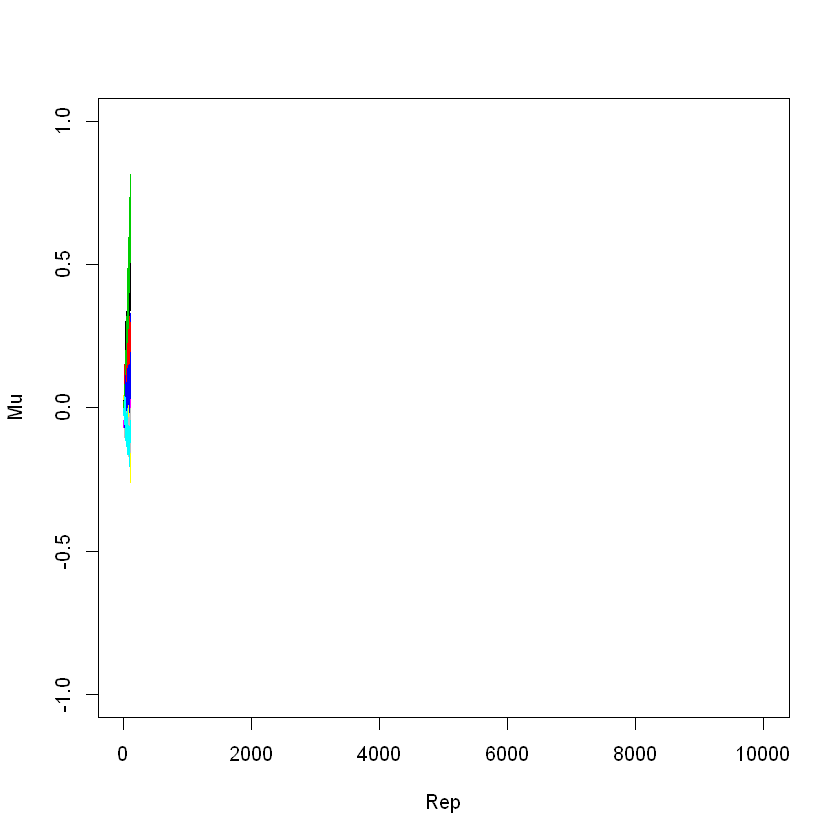

      200  0.311        0.530   0.514        1.02        0.89    1:33  
      300  0.306        0.609   0.628        1.98        1.36    1:26  


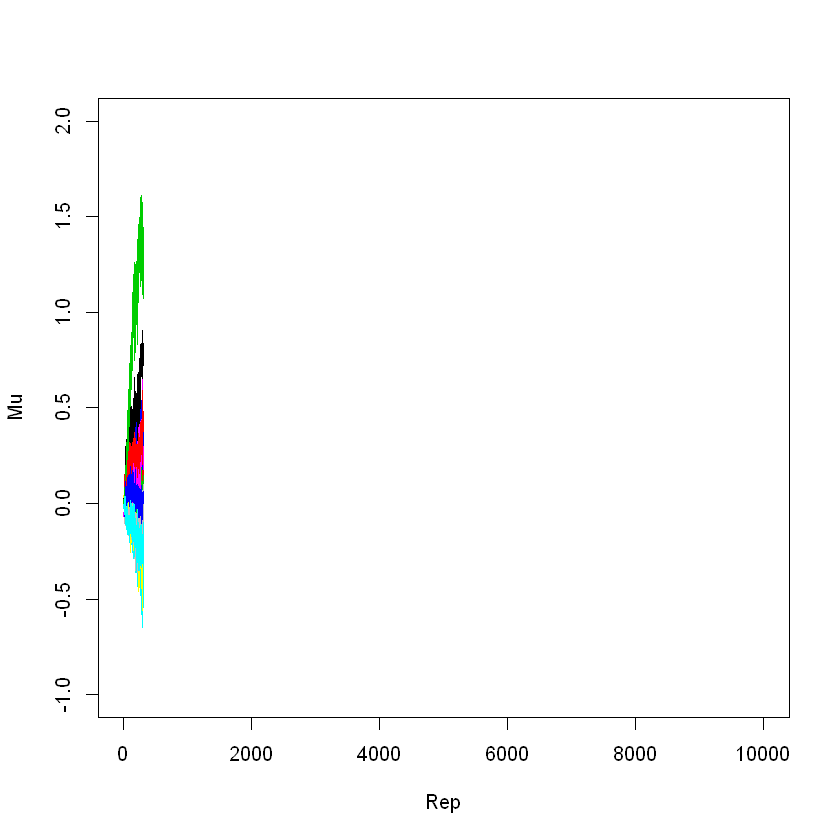

      400  0.305        0.651   0.684        2.94        1.73    1:25  
      500  0.304        0.674   0.713        4.07        2.06    1:22  
      600  0.302        0.689   0.731        5.02        2.31    1:20  


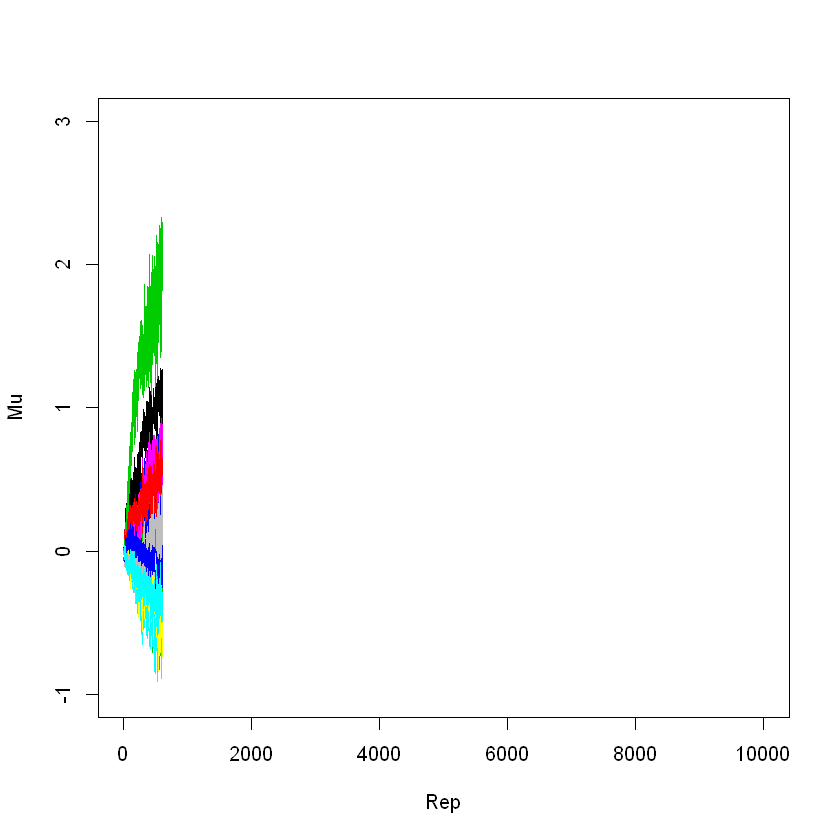

      700  0.306        0.699   0.741        6.00        2.53    1:20  
      800  0.305        0.705   0.748        7.15        2.77    1:18  
      900  0.312        0.709   0.752        8.05        2.95    1:17  
     1000  0.309        0.715   0.758        9.12        3.16    1:16  


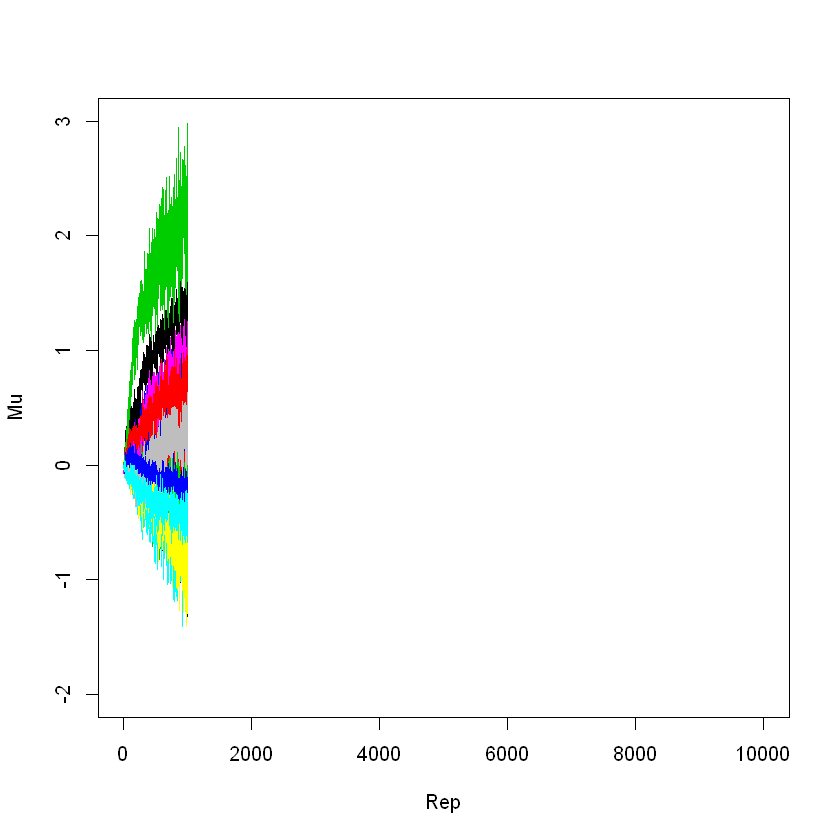

     1100  0.302        0.719   0.762        10.19       3.34    1:16  
     1200  0.301        0.721   0.764        10.93       3.46    1:15  
     1300  0.304        0.723   0.766        11.40       3.53    1:13  
     1400  0.301        0.725   0.768        12.03       3.64    1:13  
     1500  0.305        0.727   0.770        12.80       3.77    1:12  
     1600  0.308        0.727   0.770        13.32       3.84    1:11  
     1700  0.303        0.728   0.771        13.91       3.92    1:11  
     1800  0.303        0.729   0.772        14.54       3.99    1:09  


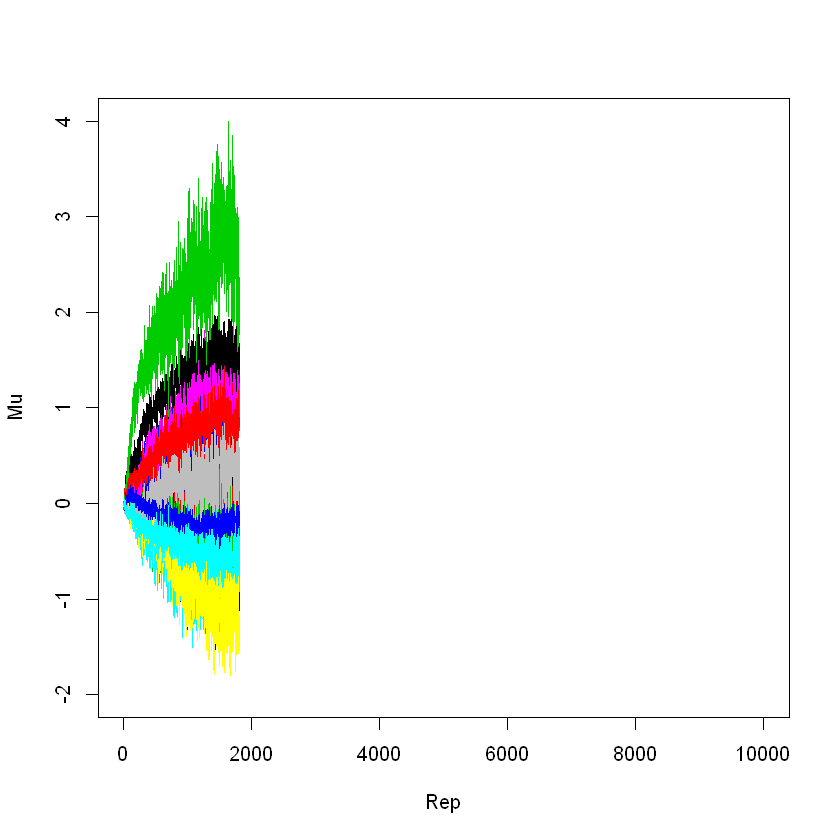

     1900  0.304        0.729   0.772        15.14       4.08    1:09  


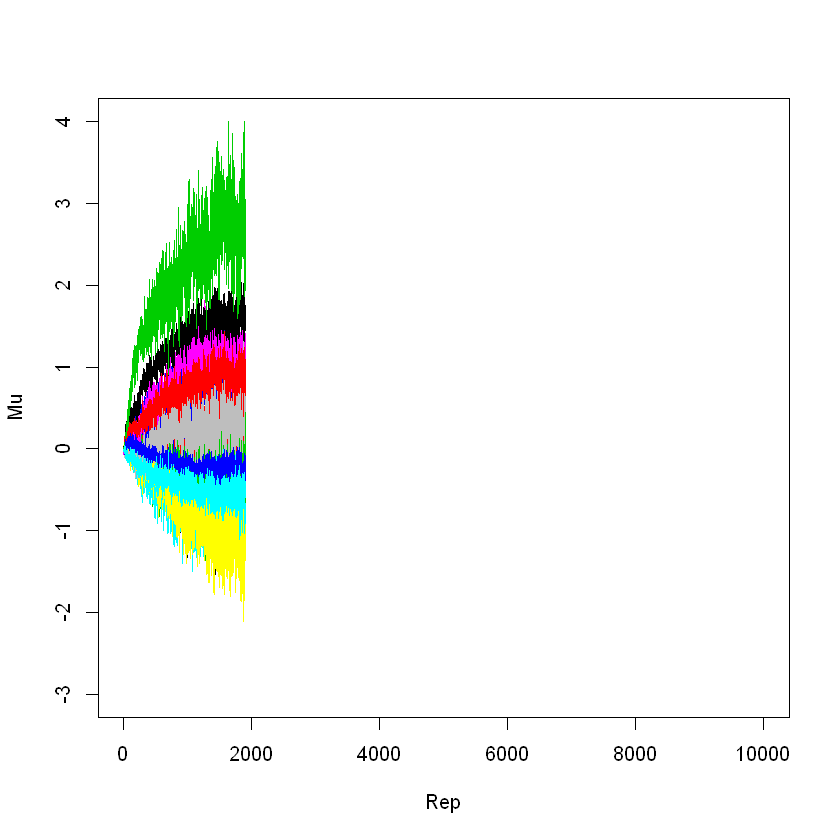

     2000  0.301        0.730   0.773        15.60       4.14    1:10  
     2100  0.303        0.730   0.773        15.65       4.16    1:08  
     2200  0.302        0.731   0.774        16.14       4.22    1:07  
     2300  0.307        0.732   0.775        16.52       4.25    1:06  
     2400  0.302        0.732   0.775        17.01       4.33    1:05  
     2500  0.303        0.734   0.776        18.26       4.48    1:04  
     2600  0.303        0.736   0.779        19.10       4.59    1:03  
     2700  0.296        0.737   0.780        19.25       4.62    1:02  
     2800  0.303        0.737   0.780        19.52       4.66    1:01  
     2900  0.305        0.738   0.781        19.94       4.71    1:00  
     3000  0.300        0.738   0.781        20.00       4.72    0:59  
     3100  0.313        0.739   0.782        20.24       4.75    0:58  
     3200  0.302        0.739   0.782        20.81       4.81    0:57  
     3300  0.305        0.739   0.782        21.05       4.86   

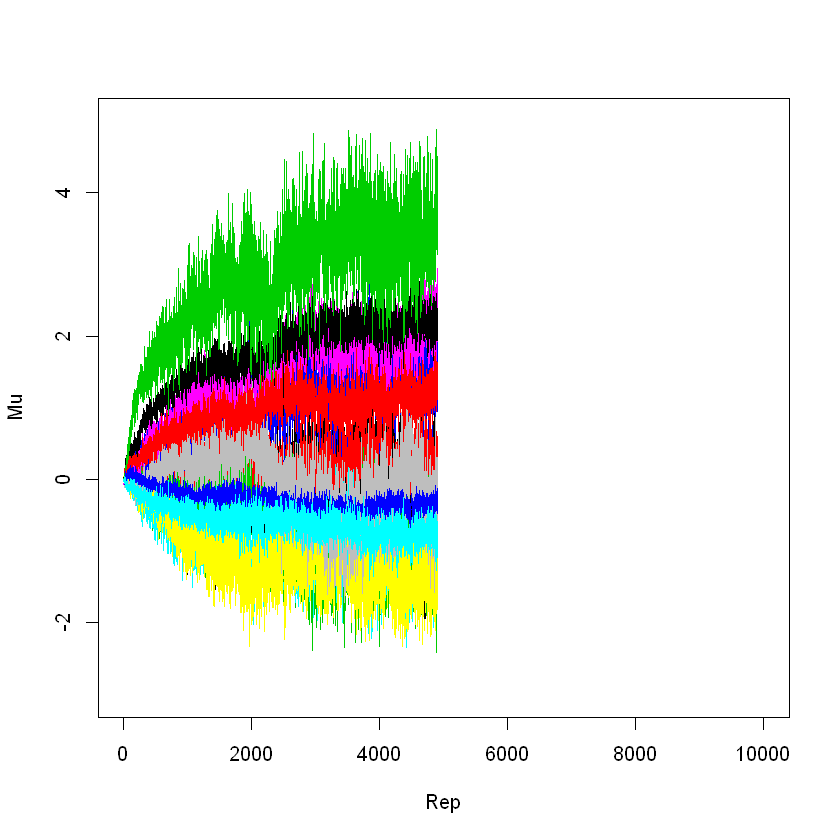

     5000  0.306        0.743   0.786        25.28       5.31    0:42  
     5100  0.308        0.743   0.786        25.54       5.35    0:41  
     5200  0.307        0.743   0.786        26.45       5.43    0:40  
     5300  0.311        0.744   0.786        26.78       5.46    0:40  
     5400  0.306        0.743   0.786        26.73       5.44    0:39  
     5500  0.304        0.743   0.785        26.46       5.40    0:38  
     5600  0.307        0.743   0.786        26.89       5.44    0:37  
     5700  0.305        0.743   0.786        27.12       5.47    0:36  
     5800  0.297        0.742   0.785        26.66       5.44    0:35  
     5900  0.301        0.742   0.784        27.20       5.48    0:34  
     6000  0.307        0.742   0.785        27.69       5.51    0:34  
     6100  0.302        0.742   0.785        27.22       5.47    0:33  
     6200  0.310        0.742   0.785        27.01       5.44    0:32  
     6300  0.306        0.743   0.785        26.44       5.41   

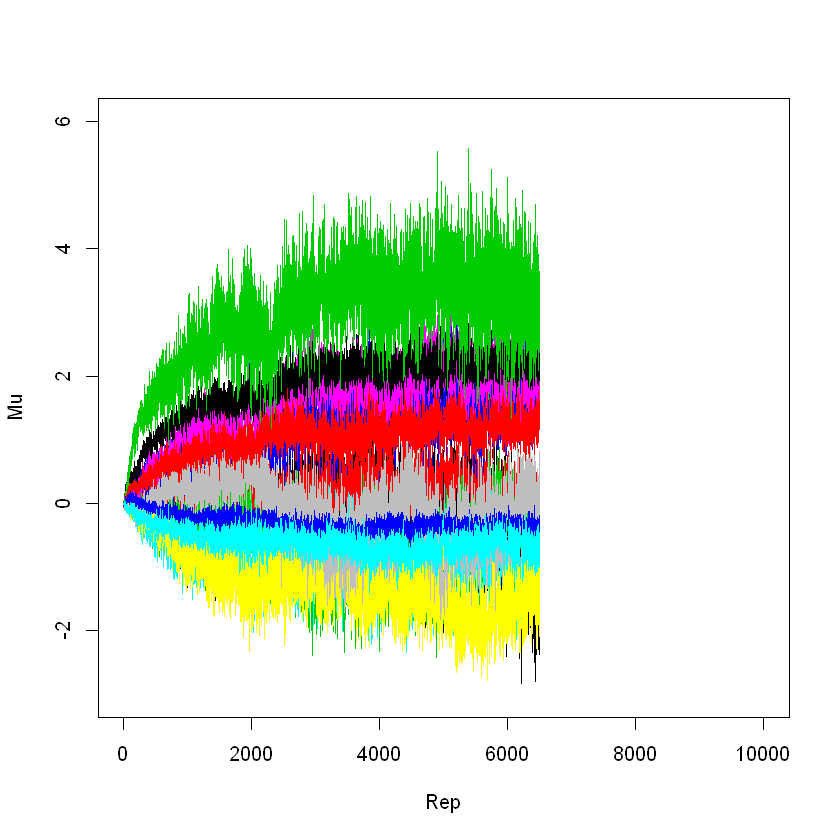

     6600  0.311        0.743   0.785        26.85       5.44    0:29  
     6700  0.304        0.743   0.786        27.07       5.47    0:28  
     6800  0.308        0.743   0.786        27.39       5.50    0:27  
     6900  0.303        0.744   0.786        27.60       5.50    0:26  
     7000  0.301        0.745   0.787        27.45       5.48    0:25  
     7100  0.307        0.745   0.788        27.18       5.46    0:25  
     7200  0.307        0.745   0.788        27.45       5.48    0:24  
     7300  0.304        0.745   0.788        27.52       5.50    0:23  
     7400  0.303        0.746   0.788        27.77       5.52    0:22  
     7500  0.306        0.746   0.789        28.11       5.55    0:21  
     7600  0.305        0.745   0.787        27.56       5.51    0:20  
     7700  0.303        0.744   0.787        26.13       5.38    0:19  
     7800  0.300        0.743   0.786        25.78       5.34    0:19  
     7900  0.304        0.744   0.786        26.01       5.35   

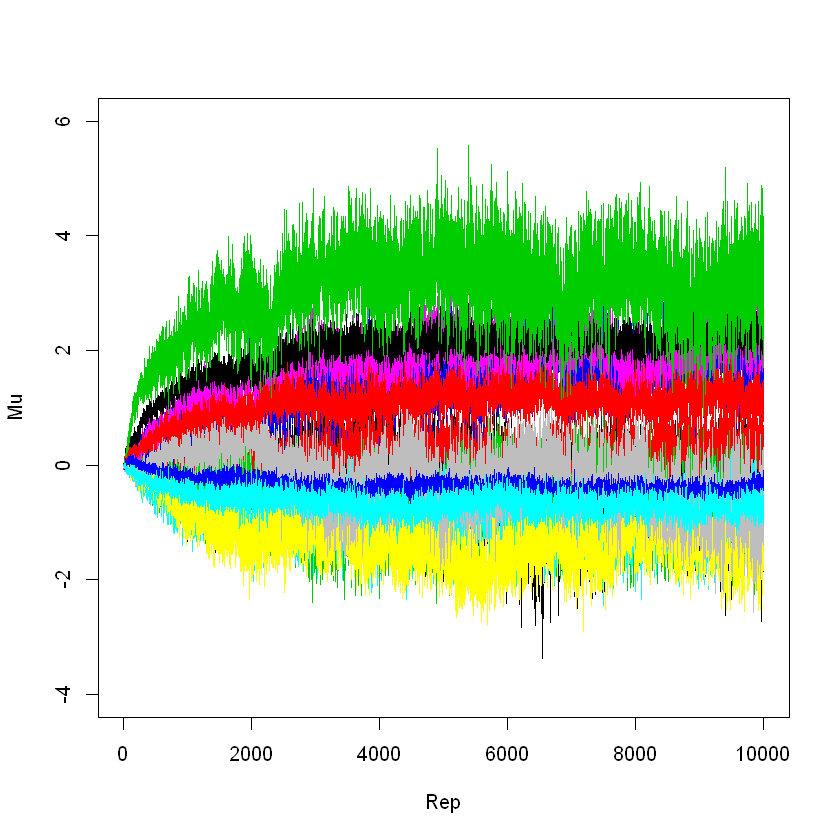

In [5]:
# set up the data frame for analysis
UnitID <- working.data.frame$id
Set <- as.integer(working.data.frame$setid)
Alt <- as.integer(working.data.frame$position)
X_1 <- as.integer(working.data.frame$brand) # categories by brand
X_2 <- as.integer(working.data.frame$compat)  # integer values 1 to 8
X_3 <- as.integer(working.data.frame$perform)  # integer values 1 to 4
X_4 <- as.integer(working.data.frame$reliab)  # integer values 1 to 2
X_5 <- as.integer(working.data.frame$learn)  # integer values 1 to 8
X_6 <- as.integer(working.data.frame$price)  # integer values 1 to 8
y <- as.numeric(working.data.frame$choice)  # using special response coding

cc.data <- data.frame(UnitID,Set,Alt,X_1,X_2,X_3,X_4,X_5,X_6,y)

# the estimation begins here... be patient
set.seed(9999)  # for reproducible results
out <- choicemodelr(data=cc.data, xcoding = cc.xcoding, 
  mcmc = cc.mcmc, options = cc.options, constraints = cc.constraints)

In [5]:
# out provides a list for the posterior parameter estimates 
# for the runs sampled (use = 2000)

# the MCMC beta parameter estimates are traced on the screen as it runs

# individual part-worth estimates are provided in the output file RBetas.csv
# the final estimates are printed to RBetas.csv with columns labeled as
#  A1B1 = first attribute first level
#  A1B2 = first attribute second level
#  ....
#  A2B1 = second attribute first level
#  ....

# gather data from HB posterior parameter distributions
# we imposed constraints on all continuous parameters so we use betadraw.c
posterior.mean <- matrix(0, nrow = dim(out$betadraw.c)[1], 
  ncol = dim(out$betadraw.c)[2])
posterior.sd <- matrix(0, nrow = dim(out$betadraw.c)[1], 
  ncol = dim(out$betadraw.c)[2])
for(index.row in 1:dim(out$betadraw.c)[1])
for(index.col in 1:dim(out$betadraw.c)[2]) { 
  posterior.mean[index.row,index.col] <- 
    mean(out$betadraw.c[index.row,index.col,])
  posterior.sd[index.row,index.col] <- 
    sd(out$betadraw.c[index.row,index.col,])
  }



ERROR: Error in matrix(0, nrow = dim(out$betadraw.c)[1], ncol = dim(out$betadraw.c)[2]): object 'out' not found


In [7]:
# HB program uses effects coding for categorical variables and
# mean-centers continuous variables across the levels appearing in the data
# working with data for one respondent at a time we compute predicted choices
# for the full set of consumer responses

create.design.matrix <- function(input.data.frame.row) {
  xdesign.row <- numeric(12)
  if (input.data.frame.row$brand == "Apple") 
    xdesign.row[1:7] <- c(1,0,0,0,0,0,0)  
  if (input.data.frame.row$brand == "Compaq") 
    xdesign.row[1:7] <- c(0,1,0,0,0,0,0)  
  if (input.data.frame.row$brand == "Dell") 
    xdesign.row[1:7] <- c(0,0,1,0,0,0,0)  
  if (input.data.frame.row$brand == "Gateway") 
    xdesign.row[1:7] <- c(0,0,0,1,0,0,0)  
  if (input.data.frame.row$brand == "HP") 
    xdesign.row[1:7] <- c(0,0,0,0,1,0,0)  
  if (input.data.frame.row$brand == "IBM") 
    xdesign.row[1:7] <- c(0,0,0,0,0,1,0)  
  if (input.data.frame.row$brand == "Sony") 
    xdesign.row[1:7] <- c(0,0,0,0,0,0,1)  
  if (input.data.frame.row$brand == "Sun") 
    xdesign.row[1:7] <- c(-1,-1,-1,-1,-1,-1,-1)    
  
  xdesign.row[8] <- input.data.frame.row$compat -4.5 
  xdesign.row[9] <- input.data.frame.row$perform -2.5
  xdesign.row[10] <- input.data.frame.row$reliab -1.5 
  xdesign.row[11] <- input.data.frame.row$learn -4.5
  xdesign.row[12] <- input.data.frame.row$price -4.5 
  t(as.matrix(xdesign.row))  # return row of design matrix
  }

In [8]:
# evaluate performance in the full set of consumer responses
working.choice.utility <- NULL  # initialize utility vector
# work with one row of respondent training data frame at a time
# create choice predictions using the individual part-worths
list.of.ids <- unique(working.data.frame$id)
for (index.for.id in seq(along=list.of.ids)) {
  this.id.part.worths <- posterior.mean[index.for.id,] 
  this.id.data.frame <- subset(working.data.frame, 
    subset=(id == list.of.ids[index.for.id]))
  for (index.for.profile in 1:nrow(this.id.data.frame)) {   
    working.choice.utility <- c(working.choice.utility,
      create.design.matrix(this.id.data.frame[index.for.profile,]) %*%
      this.id.part.worths)
    }  
  }  

working.predicted.choice <- 
  choice.set.predictor(working.choice.utility)
working.actual.choice <- factor(working.data.frame$choice, levels = c(0,1), 
  labels = c("NO","YES"))  
# look for sensitivity > 0.25 for four-profile choice sets 
working.set.performance <- confusionMatrix(data = working.predicted.choice, 
  reference = working.actual.choice, positive = "YES")
# report choice prediction sensitivity for the full data
cat("\n\nFull data set choice set sensitivity = ",
  sprintf("%1.1f",working.set.performance$byClass[1]*100)," Percent",sep="")
# 
# results: Full data set choice set sensitivity = 89.1 Percent
#



Full data set choice set sensitivity = 89.1 Percent

In [9]:
# to continue with our analysis of consumer preferences...
# we build a data frame for the consumers with the full set of eight brands
ID <- unique(working.data.frame$id)
Apple <- posterior.mean[,1]
Compaq <- posterior.mean[,2]
Dell <- posterior.mean[,3]
Gateway <- posterior.mean[,4]
HP <- posterior.mean[,5]
IBM <- posterior.mean[,6]
Sony <- posterior.mean[,7]

Sun <- -1 * (Apple + Compaq + Dell + Gateway + HP + IBM + Sony)

Compatibility <- posterior.mean[,8]
Performance <- posterior.mean[,9]
Reliability <- posterior.mean[,10]
Learning <- posterior.mean[,11]
Price <- posterior.mean[,12]


In [10]:
# creation of data frame for analysis of consumer preferences and choice
# starting with individual-level part-worths... more to be added shortly
id.data <- data.frame(ID,Apple,Compaq,Dell,Gateway,HP,IBM,Sony,Sun,
  Compatibility,Performance,Reliability,Learning,Price)

# compute attribute importance values for each attribute
id.data$brand.range <- numeric(nrow(id.data))
id.data$compatibility.range <- numeric(nrow(id.data))
id.data$performance.range <- numeric(nrow(id.data))
id.data$reliability.range <- numeric(nrow(id.data))
id.data$learning.range <- numeric(nrow(id.data))
id.data$price.range <- numeric(nrow(id.data))
id.data$sum.range <- numeric(nrow(id.data))
id.data$brand.importance <- numeric(nrow(id.data))
id.data$compatibility.importance <- numeric(nrow(id.data))
id.data$performance.importance <- numeric(nrow(id.data))
id.data$reliability.importance <- numeric(nrow(id.data))
id.data$learning.importance <- numeric(nrow(id.data))
id.data$price.importance <- numeric(nrow(id.data))

for(id in seq(along=id.data$ID)) {
  id.data$brand.range[id] <- max(id.data$Apple[id],
    id.data$Compaq[id],id.data$Dell[id],
    id.data$Gateway[id],id.data$HP[id],
    id.data$IBM[id],id.data$Sony[id],
    id.data$Sun[id]) - 
    min(id.data$Apple[id],
    id.data$Compaq[id],id.data$Dell[id],
    id.data$Gateway[id],id.data$HP[id],
    id.data$IBM[id],id.data$Sony[id],
    id.data$Sun[id])
 
  id.data$compatibility.range[id] <- abs(8*id.data$Compatibility[id])  
  id.data$performance.range[id] <- abs(4*id.data$Performance[id]) 
  id.data$reliability.range[id] <- abs(2*id.data$Reliability[id]) 
  id.data$learning.range[id] <- abs(8*id.data$Learning[id])
  id.data$price.range[id] <-  abs(8*id.data$Price[id])

  id.data$sum.range[id] <- id.data$brand.range[id] + 
    id.data$compatibility.range[id] +
    id.data$performance.range[id] +
    id.data$reliability.range[id] +
    id.data$learning.range[id] +
    id.data$price.range[id]
 
  id.data$brand.importance[id] <- 
    id.data$brand.range[id]/id.data$sum.range[id]
  id.data$compatibility.importance[id] <- 
    id.data$compatibility.range[id]/id.data$sum.range[id]
  id.data$performance.importance[id] <- 
    id.data$performance.range[id]/id.data$sum.range[id]
  id.data$reliability.importance[id] <- 
    id.data$reliability.range[id]/id.data$sum.range[id]
  id.data$learning.importance[id] <- 
    id.data$learning.range[id]/id.data$sum.range[id]
  id.data$price.importance[id] <- 
    id.data$price.range[id]/id.data$sum.range[id]
  
# feature importance relates to the most important product feature
# considering product features as not brand and not price
  id.data$feature.importance[id] <- max(id.data$compatibility.importance[id],
    id.data$performance.importance[id], 
    id.data$reliability.importance[id], 
    id.data$learning.importance[id])
  }
 
# identify each individual's top brand defining top.brand factor variable
id.data$top.brand <- integer(nrow(id.data)) 
for(id in seq(along=id.data$ID)) {
  brand.index <- 1:8
  brand.part.worth <- c(id.data$Apple[id],id.data$Compaq[id],
    id.data$Dell[id],id.data$Gateway[id],id.data$HP[id],id.data$IBM[id],
    id.data$Sony[id],id.data$Sun[id])
  temp.data <- data.frame(brand.index,brand.part.worth)
  temp.data <- temp.data[sort.list(temp.data$brand.part.worth, decreasing = TRUE),]
  id.data$top.brand[id] <- temp.data$brand.index[1]
  }
id.data$top.brand <- factor(id.data$top.brand, levels = 1:8,
  labels = c("Apple","Compaq","Dell","Gateway",
  "HP","IBM","Sony","Sun"))

In [11]:
# note that the standard importance measures from conjoint methods are
# ipsative... their sum is always 1 for proportions or 100 for percentages 
# this has advantages for triplots (ternary plots) but because importance
# is so dependent upon the levels of attributes, it has significant
# disadvantages as well... so we consider a relative-value-based measure
# lets us define an alternative to importance called "attribute value"
# compute "attribute value" relative to the consumer group 
# it is a standardized measure... let "attribute value" be mean 50 sd 10
# here are user-defined functions to use to obtain "value"

standardize <- function(x) {
# standardize x so it has mean zero and standard deviation 1
  (x - mean(x))/sd(x)
  }
compute.value <- function(x) {
# rescale x so it has the same mean and standard deviation as y  
  standardize(x) * 10 + 50
 }

id.data$brand.value <- compute.value(id.data$brand.range)
id.data$compatibility.value <- compute.value(id.data$compatibility.range)
id.data$performance.value <- compute.value(id.data$performance.range)
id.data$reliability.value <- compute.value(id.data$reliability.range)
id.data$learning.value <- compute.value(id.data$learning.range)
id.data$price.value <- compute.value(id.data$price.range)

# identify each individual's top value using computed relative attribute values 
id.data$top.attribute <- integer(nrow(id.data)) 
for(id in seq(along=id.data$ID)) {
  attribute.index <- 1:6
  attribute.value <- c(id.data$brand.value[id],id.data$compatibility.value[id],
    id.data$performance.value[id],id.data$reliability.value[id],
    id.data$learning.value[id],id.data$price.value[id])
  temp.data <- data.frame(attribute.index,attribute.value)
  temp.data <- 
    temp.data[sort.list(temp.data$attribute.value, decreasing = TRUE),]
  id.data$top.attribute[id] <- temp.data$attribute.index[1]
  }
id.data$top.attribute <- factor(id.data$top.attribute, levels = 1:6,
  labels = c("Brand","Compatibility","Performance","Reliability",
  "Learning","Price"))

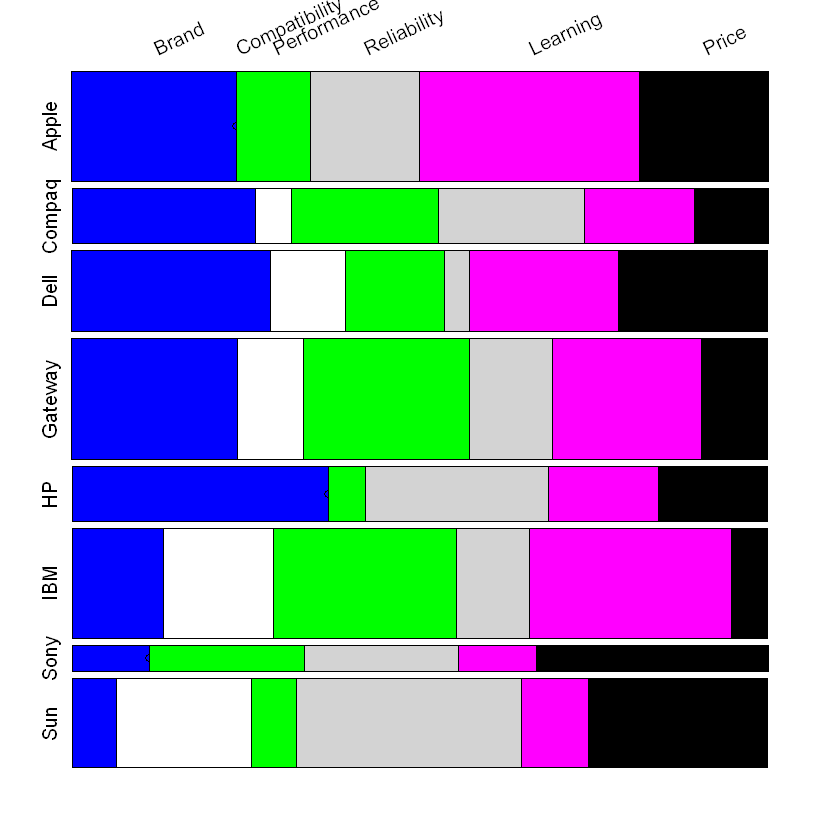

In [12]:
# mosaic plot of joint frequencies top ranked brand by top value
#pdf(file="fig_price_top_top_mosaic_plot.pdf", width = 8.5, height = 11)
  mosaic( ~ top.brand + top.attribute, data = id.data, 
  highlighting = "top.attribute",
  highlighting_fill = 
    c("blue", "white", "green","lightgray","magenta","black"),
  labeling_args = 
  list(set_varnames = c(top.brand = "", top.attribute = ""),
  rot_labels = c(left = 90, top = 25),
  pos_labels = c("center","center"),
  just_labels = c("left","center"),
  offset_labels = c(0.0,0.0)))  
#dev.off()  


Warning message in if (prop_size) prop_size * (s/max(s)) else cex:
"the condition has length > 1 and only the first element will be used"

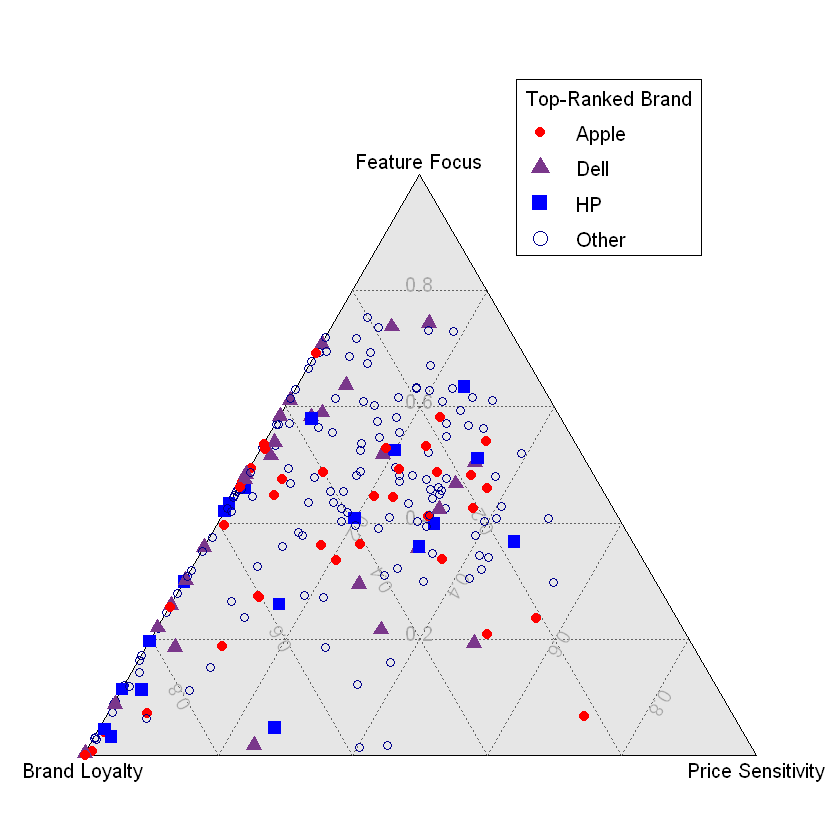

In [13]:

# an alternative representation that is often quite useful in pricing studies
# is a triplot/ternary plot with three features identified for each consumer
# using the idea from importance caluclations we now use price, brand, and 
# feature importance measures to obtain data for three-way plots
# as the basis for three relative measures, which we call brand.loyalty,
# price.sensitivity, and feature_focus...

id.data$brand.loyalty <- numeric(nrow(id.data)) 
id.data$price.sensitivity <- numeric(nrow(id.data)) 
id.data$feature.focus <- numeric(nrow(id.data)) 
for(id in seq(along=id.data$ID)) {
  sum.importances <- id.data$brand.importance[id] + 
  id.data$price.importance[id] +
  id.data$feature.importance[id]  # less than 1.00 feature is an average
  id.data$brand.loyalty[id] <- id.data$brand.importance[id]/sum.importances
  id.data$price.sensitivity[id] <- id.data$price.importance[id]/sum.importances
  id.data$feature.focus[id] <- id.data$feature.importance[id]/sum.importances
  }

# ternary model of consumer response... the plot  
#pdf("fig_price_ternary_three_brands.pdf", width = 11, height = 8.5)  
ternaryplot(id.data[,c("brand.loyalty","price.sensitivity","feature.focus")], 
dimnames = c("Brand Loyalty","Price Sensitivity","Feature Focus"),
prop_size = ifelse((id.data$top.brand == "Apple"), 0.8, 
            ifelse((id.data$top.brand == "Dell"),0.7,
            ifelse((id.data$top.brand == "HP"),0.7,0.5))),
pch = ifelse((id.data$top.brand == "Apple"), 20, 
      ifelse((id.data$top.brand == "Dell"),17,
      ifelse((id.data$top.brand == "HP"),15,1))),
col = ifelse((id.data$top.brand == "Apple"), "red",
      ifelse((id.data$top.brand == "Dell"),"mediumorchid4",
      ifelse((id.data$top.brand == "HP"),"blue","darkblue"))),
grid_color = "#626262",
bg = "#E6E6E6",
dimnames_position = "corner", main = ""
) 
grid_legend(0.725, 0.8, pch = c(20, 17, 15, 1),
col = c("red", "mediumorchid4", "blue", "darkblue"), 
c("Apple", "Dell", "HP", "Other"), title = "Top-Ranked Brand")
#dev.off()   











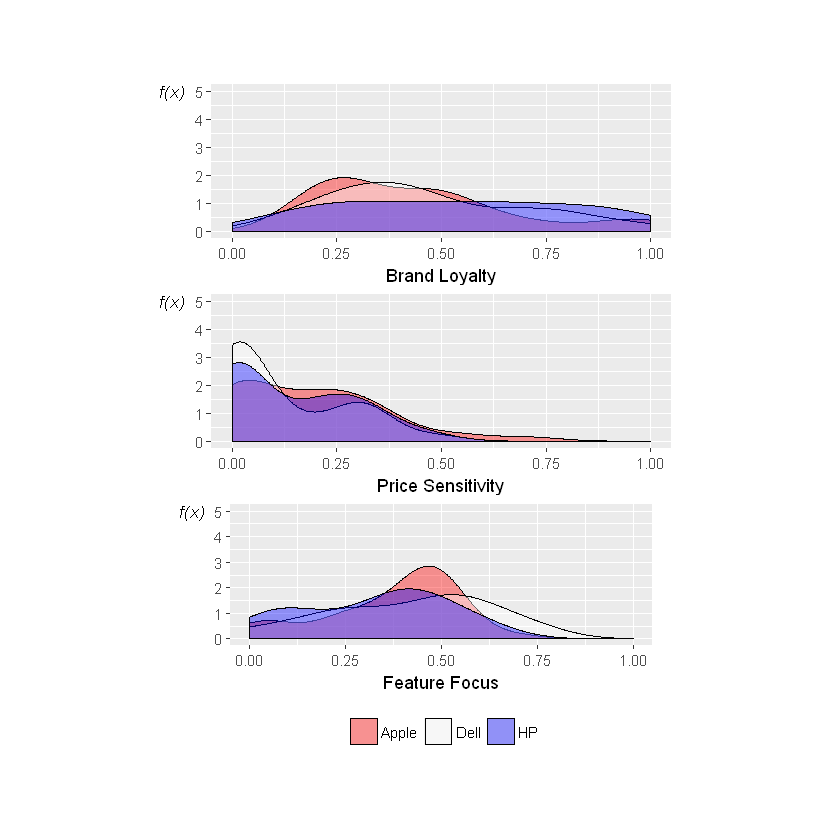

In [14]:
# another way of looking at these data is to employ comparative densities
# for the three selected brands: Apple, Dell, and HP
# using those individual how selected these as the top brand
selected.brands <- c("Apple","Dell","HP")
selected.data <- subset(id.data, subset = (top.brand %in% selected.brands))

# plotting objects for brand.loyalty, price.sensitivity, and feature.focus
# create these three objects and then plot them together on one page
#pdf("fig_price_density_three_brands.pdf", width = 8.5, height = 11)  
first.object <- ggplot(selected.data, 
  aes(x = brand.loyalty, fill = top.brand))  +
  labs(x = "Brand Loyalty", 
       y = "f(x)") +
  theme(axis.title.y = element_text(angle = 0, face = "italic", size = 10)) +     
  geom_density(alpha = 0.4) +
  coord_fixed(ratio = 1/15) +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("red","white","blue"), 
    guide = guide_legend(title = NULL)) +
  scale_x_continuous(limits = c(0,1)) +
  scale_y_continuous(limits = c(0,5)) 

second.object <- ggplot(selected.data, 
  aes(x = price.sensitivity, fill = top.brand))  +
  labs(x = "Price Sensitivity", 
       y = "f(x)") +
  theme(axis.title.y = element_text(angle = 0, face = "italic", size = 10)) +      
  geom_density(alpha = 0.4) +
  coord_fixed(ratio = 1/15) +
  theme(legend.position = "none") +
  scale_fill_manual(values = c("red","white","blue"), 
    guide = guide_legend(title = NULL)) +
  scale_x_continuous(limits = c(0,1))  +
  scale_y_continuous(limits = c(0,5))  

third.object <- ggplot(selected.data, 
  aes(x = feature.focus, fill = top.brand))  +
  labs(x = "Feature Focus", 
       y = "f(x)") +
  theme(axis.title.y = element_text(angle = 0, face = "italic", size = 10)) +      
  geom_density(alpha = 0.4) +
  coord_fixed(ratio = 1/15) +
  theme(legend.position = "bottom") +
  scale_fill_manual(values = c("red","white","blue"), 
    guide = guide_legend(title = NULL)) +
  scale_x_continuous(limits = c(0,1)) +
  scale_y_continuous(limits = c(0,5))  

three.part.ggplot.print.with.margins(ggfirstplot.object.name = first.object,
  ggsecondplot.object.name = second.object,
  ggthirdplot.object.name = third.object,
  left.margin.pct=5,right.margin.pct=5,
  top.margin.pct=10,bottom.margin.pct=9,
  first.plot.pct=25,second.plot.pct=25,
  third.plot.pct=31)
#dev.off()



# Starting Point for Choosing Again
## Software Demo 7.5.1

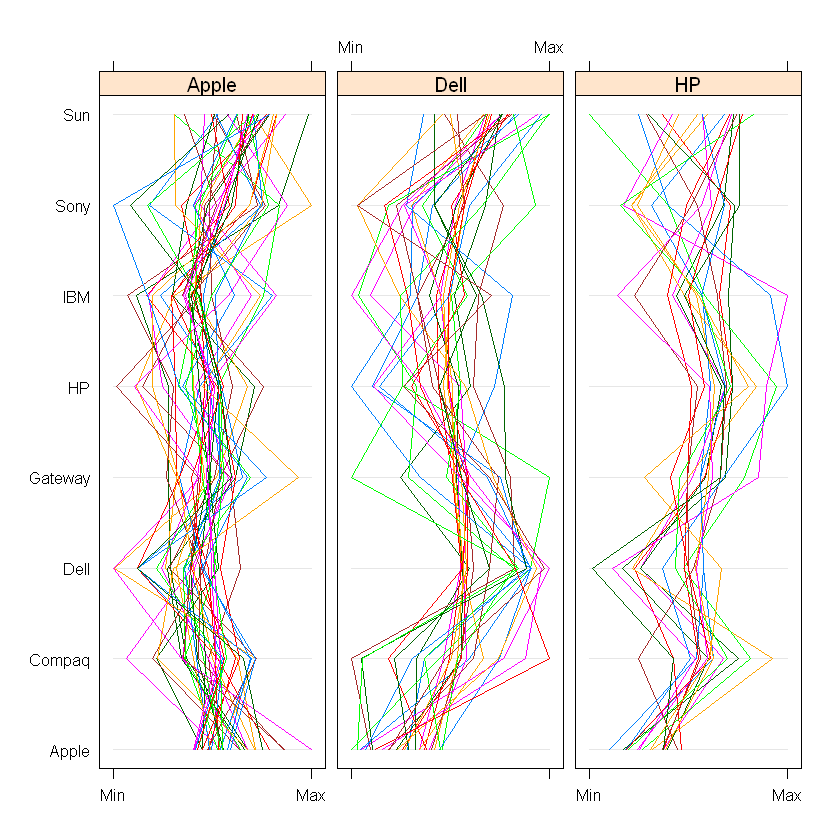

In [15]:
# to what extent are consumers open to switching from one brand to another
# can see this trough parallel coordinates plots for the brand part-worths
#pdf(file = "fig_price_parallel_coordinates_individuals.pdf", 
#  width = 8.5, height = 11)
print(parallelplot(~selected.data[,c("Apple","Compaq","Dell","Gateway",
  "HP","IBM","Sony","Sun")] | top.brand, selected.data, layout = c (3,1)))
#dev.off()  
  


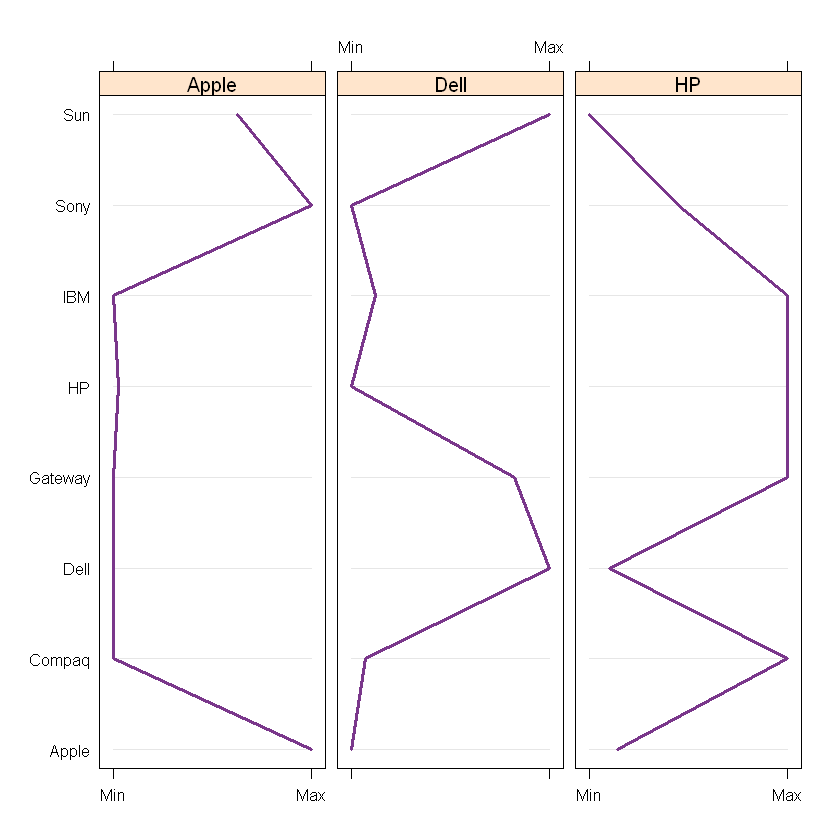

In [16]:
# these get a little messy or cluttered...  
# more easily interpreted are parallel coordinate plots of mean part-worths
# for brand part-worth columns and aggregate by top brand (Apple, Dell, or HP)
brands.data <- aggregate(x = selected.data[,2:9], 
  by = selected.data[29], mean)

#pdf(file = "fig_price_parallel_coordinates_groups.pdf", 
# width = 8.5, height = 11)
print(parallelplot(~brands.data[,c("Apple","Compaq","Dell","Gateway",
  "HP","IBM","Sony","Sun")] | top.brand, brands.data, layout = c (3,1), 
   lwd = 3, col = "mediumorchid4")) 
#dev.off()

# Starting Point for Consumer Preference
## Software Demo 7.5.2

In [17]:
# market simulation for hypothetical set of products in the marketplace  
# suppose we work for Apple and we focus upon a market with three 
# competitors: Dell, Gateway, and HP.... we define the products in the
# market using values from the computer choice study just as we did
# in fitting the HB model... we create the simuation input data frame
# and use the previously designed function create.design.matrix
# along with simulation utility functions 

# first product in market is Dell Computer defined as follows:
brand <- "Dell"
compat <- 8  # 100 percent compatibility
perform <- 4 # four times as fast as earlier generation system
reliab <- 2  # Less likely to fail 
learn <- 4  # 16 hours to learn
price <- 4  # $1750
dell.competitor <- 
  data.frame(brand,compat,perform,reliab,learn,price)

# second product in market is Gateway defined as follows:
brand <- "Gateway"
compat <- 6  # 90 percent compatibility
perform <- 2 # twice as fast as earlier generation system
reliab <- 1  # just as likely to fail 
learn <- 2  # 8 hours to learn
price <- 2  # $1250
gateway.competitor <- 
  data.frame(brand,compat,perform,reliab,learn,price)

# third product in market is HP defined as follows:
brand <- "HP"
compat <- 6  # 90 percent compatibility
perform <- 3 # three times as fast as earlier generation system
reliab <- 2  # less likely to fail 
learn <- 2  # 8 hours to learn
price <- 3  # $1500
hp.competitor <- 
  data.frame(brand,compat,perform,reliab,learn,price)

# Apple product has price varying across many choice sets:
brand <- "Apple"
compat <- 5  # 50 percent compatibility
perform <- 4 # four times as fast as earlier generation system
reliab <- 2  # less likely to fail 
learn <- 1  # 4 hours to learn
price <- 1  # $1000 Apple price in first choice set 
apple1000 <- 
  data.frame(brand,compat,perform,reliab,learn,price)

price <- 2  # $1250 Apple price in second choice set
apple1250 <- 
  data.frame(brand,compat,perform,reliab,learn,price)
  
price <- 3  # $1500 Apple price in third choice set
apple1500 <- 
  data.frame(brand,compat,perform,reliab,learn,price)
  
price <- 4  # $1750 Apple price in fourth choice set
apple1750 <- 
  data.frame(brand,compat,perform,reliab,learn,price)
  
price <- 5  # $2000 Apple price in fifth choice set
apple2000 <- 
  data.frame(brand,compat,perform,reliab,learn,price)
  
price <- 6  # $2250 Apple price in sixth choice set
apple2250 <- 
  data.frame(brand,compat,perform,reliab,learn,price)
  
price <- 7  # $2500 Apple price in seventh choice set
apple2500 <- 
  data.frame(brand,compat,perform,reliab,learn,price)

price <- 8  # $2750 Apple price in eighth choice set
apple2750 <- 
  data.frame(brand,compat,perform,reliab,learn,price)

# the competitive products are fixed from one choice set to the next
competition <- rbind(dell.competitor,gateway.competitor,hp.competitor)

In [18]:
# build the simulation choice sets with Apple varying across choice sets
simulation.choice.sets <- 
  rbind(competition, apple1000, competition, apple1250,
  competition, apple1500, competition, apple1750, competition, apple2000, 
  competition, apple2250, competition, apple2500, competition, apple2750)

# add set id to the simuation.choice sets for ease of analysis
setid <- NULL
for(index.for.set in 1:8) setid <- c(setid,rep(index.for.set, times = 4))
simulation.choice.sets <- cbind(setid,simulation.choice.sets)
  
# list the simulation data frame to check it out
cat("\n\n ----- Simulation Choice Sets -----\n\n")
print(simulation.choice.sets)



 ----- Simulation Choice Sets -----

   setid   brand compat perform reliab learn price
1      1    Dell      8       4      2     4     4
2      1 Gateway      6       2      1     2     2
3      1      HP      6       3      2     2     3
4      1   Apple      5       4      2     1     1
5      2    Dell      8       4      2     4     4
6      2 Gateway      6       2      1     2     2
7      2      HP      6       3      2     2     3
8      2   Apple      5       4      2     1     2
9      3    Dell      8       4      2     4     4
10     3 Gateway      6       2      1     2     2
11     3      HP      6       3      2     2     3
12     3   Apple      5       4      2     1     3
13     4    Dell      8       4      2     4     4
14     4 Gateway      6       2      1     2     2
15     4      HP      6       3      2     2     3
16     4   Apple      5       4      2     1     4
17     5    Dell      8       4      2     4     4
18     5 Gateway      6       2      1     

In [19]:
# create the simulation data frame for all individuals in the study
# by cloning the simulation choice sets for each individual
simulation.data.frame <- NULL  # initialize
list.of.ids <- unique(working.data.frame$id)  # ids from original study
for (index.for.id in seq(along=list.of.ids)) {
  id <- rep(list.of.ids[index.for.id], times = nrow(simulation.choice.sets))
  this.id.data <- cbind(data.frame(id),simulation.choice.sets)
  simulation.data.frame <- rbind(simulation.data.frame, this.id.data)
  }
  
# check structure of simulation data frame
cat("\n\n ----- Structure of Simulation Data frame -----\n\n")
print(str(simulation.data.frame))
print(head(simulation.data.frame))
print(tail(simulation.data.frame))



 ----- Structure of Simulation Data frame -----

'data.frame':	7168 obs. of  8 variables:
 $ id     : int  1 1 1 1 1 1 1 1 1 1 ...
 $ setid  : int  1 1 1 1 2 2 2 2 3 3 ...
 $ brand  : Factor w/ 4 levels "Dell","Gateway",..: 1 2 3 4 1 2 3 4 1 2 ...
 $ compat : num  8 6 6 5 8 6 6 5 8 6 ...
 $ perform: num  4 2 3 4 4 2 3 4 4 2 ...
 $ reliab : num  2 1 2 2 2 1 2 2 2 1 ...
 $ learn  : num  4 2 2 1 4 2 2 1 4 2 ...
 $ price  : num  4 2 3 1 4 2 3 2 4 2 ...
NULL
  id setid   brand compat perform reliab learn price
1  1     1    Dell      8       4      2     4     4
2  1     1 Gateway      6       2      1     2     2
3  1     1      HP      6       3      2     2     3
4  1     1   Apple      5       4      2     1     1
5  1     2    Dell      8       4      2     4     4
6  1     2 Gateway      6       2      1     2     2
      id setid   brand compat perform reliab learn price
7163 999     7      HP      6       3      2     2     3
7164 999     7   Apple      5       4      2     1     

In [20]:
# using create.design.matrix function we evalutate the utility 
# of each product profile in each choice set for each individual 
# in the study... HP part-worths are used for individuals
# this code is similar to that used previously for original data
# from the computer choice study... except now we have simulation data
simulation.choice.utility <- NULL  # initialize utility vector
# work with one row of respondent training data frame at a time
# create choice prediction using the individual part-worths
list.of.ids <- unique(simulation.data.frame$id)
simulation.choice.utility <- NULL  # intitialize
for (index.for.id in seq(along=list.of.ids)) {
  this.id.part.worths <- posterior.mean[index.for.id,] 
  this.id.data.frame <- subset(simulation.data.frame, 
    subset=(id == list.of.ids[index.for.id]))
  for (index.for.profile in 1:nrow(this.id.data.frame)) {   
    simulation.choice.utility <- c(simulation.choice.utility,
      create.design.matrix(this.id.data.frame[index.for.profile,]) %*%
      this.id.part.worths)
    }  
  } 

In [21]:
# use choice.set.predictor function to predict choices in market simulation
simulation.predicted.choice <- 
  choice.set.predictor(simulation.choice.utility)
  
# add simulation predictions to simulation data frame for analysis
# of the results from the market simulation
simulation.analysis.data.frame <- 
  cbind(simulation.data.frame,simulation.predicted.choice)

In [22]:
# contingency table shows results of market simulation  
with(simulation.analysis.data.frame,
  table(setid,brand,simulation.predicted.choice))

, , simulation.predicted.choice = NO

     brand
setid Dell Gateway  HP Apple
    1  133     204 193   142
    2  126     202 191   153
    3  123     202 186   161
    4  119     199 183   171
    5  119     196 181   176
    6  114     196 180   182
    7  109     195 178   190
    8  109     194 178   191

, , simulation.predicted.choice = YES

     brand
setid Dell Gateway  HP Apple
    1   91      20  31    82
    2   98      22  33    71
    3  101      22  38    63
    4  105      25  41    53
    5  105      28  43    48
    6  110      28  44    42
    7  115      29  46    34
    8  115      30  46    33


In [23]:



  
# summary table of preference shares
YES.data.frame <- subset(simulation.analysis.data.frame, 
  subset = (simulation.predicted.choice == "YES"), select = c("setid","brand"))

# check YES.data.frame to see that it reproduces the information
# from the contingency table 
print(with(YES.data.frame,table(setid,brand)))

     brand
setid Dell Gateway  HP Apple
    1   91      20  31    82
    2   98      22  33    71
    3  101      22  38    63
    4  105      25  41    53
    5  105      28  43    48
    6  110      28  44    42
    7  115      29  46    34
    8  115      30  46    33


In [24]:

# create market share estimates by dividing by number of individuals
# no need for a spreasheet program to work with tables
table.work <- with(YES.data.frame,as.matrix(table(setid,brand)))
table.work <- table.work[,c("Apple","Dell","Gateway","HP")] # order columns
table.work <- round(100 *table.work/length(list.of.ids), digits = 1)  # percent 
Apple.Price <- c(1000,1250,1500,1750,2000,2250,2500,2750)  # new column
table.work <- cbind(Apple.Price,table.work) # add price column to table
cat("\n\n ----- Simulation Results: Preference Share Table -----\n\n")
print(table.work)  # print the market/preference share table



 ----- Simulation Results: Preference Share Table -----

  Apple.Price Apple Dell Gateway   HP
1        1000  36.6 40.6     8.9 13.8
2        1250  31.7 43.8     9.8 14.7
3        1500  28.1 45.1     9.8 17.0
4        1750  23.7 46.9    11.2 18.3
5        2000  21.4 46.9    12.5 19.2
6        2250  18.8 49.1    12.5 19.6
7        2500  15.2 51.3    12.9 20.5
8        2750  14.7 51.3    13.4 20.5


In [25]:

# data visualization of market/preference share estimates from the simulation 
mosaic.data.frame <- YES.data.frame
mosaic.data.frame$setid <- factor(mosaic.data.frame$setid, levels = 1:8,
  labels = c("$1,000","$1,250","$1,500","$1,750",
  "$2,000","$2,250","2,500","$2,750"))

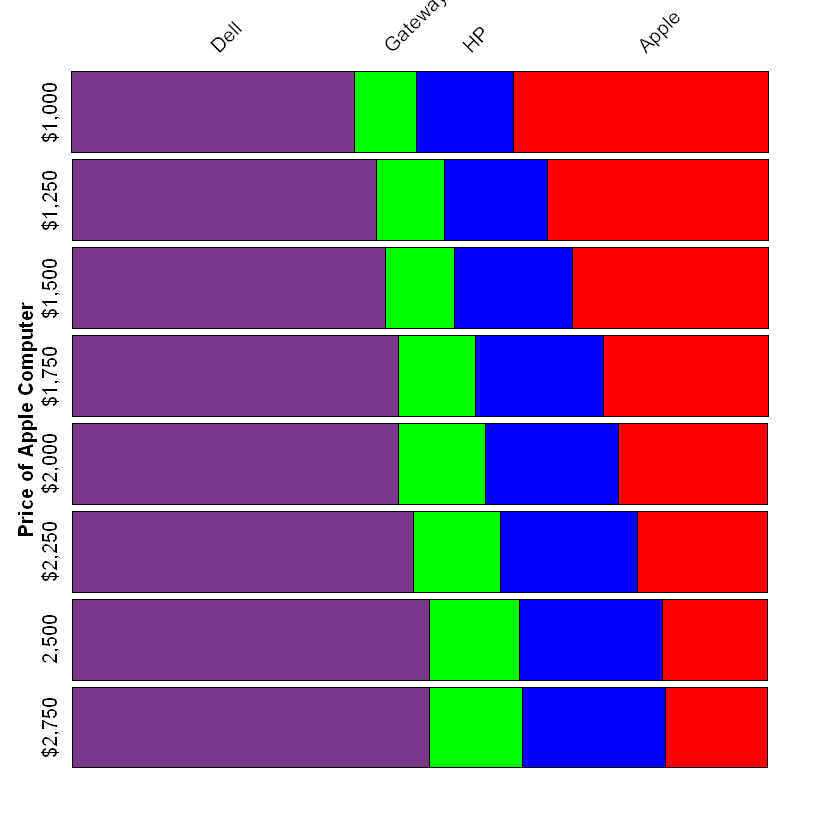

In [26]:
# mosaic plot of joint frequencies from the market simulation
# length/width of the tiles in each row reflects market share
# rows relate to Apple prices... simulation choice sets
# pdf(file="fig_price_market_simulation_results.pdf", width = 8.5, height = 11)
  mosaic( ~ setid + brand, data = mosaic.data.frame, 
  highlighting = "brand",
  highlighting_fill = 
    c("mediumorchid4", "green", "blue","red"),
  labeling_args = 
  list(set_varnames = c(brand = "", setid = "Price of Apple Computer"),
  rot_labels = c(left = 90, top = 45),
  pos_labels = c("center","center"),
  just_labels = c("left","center"),
  offset_labels = c(0.0,0.0)))  
# dev.off()  

In [ ]:






# suggestion for students
# try setting up your own market simulation study with a hypothetical client
# and competitive products... vary prices on your client's product 
# and see what happens to preference shares
